In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.3),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09934903],
       [0.10033265],
       [0.09965493],
       [0.10092774],
       [0.09969543],
       [0.09783939],
       [0.09880546],
       [0.09868213],
       [0.1013024 ],
       [0.10341083]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.315851428842731

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=128
)


0 cost 1.8333278951908525
10 cost 1.415205584211962
20 cost 1.2240585033905909
30 cost 1.099437000026191
40 cost 1.0635353834099857
50 cost 1.0850946979122675
60 cost 0.9736444258691255
70 cost 0.6272716673735399
80 cost 0.6727577446992002
90 cost 0.6447413801038491
100 cost 0.5418950706336282
110 cost 0.4845043087546447
120 cost 0.4773733826541836
130 cost 0.41071556847846735
140 cost 0.25265966108926596
150 cost 0.42487111812221307
160 cost 0.5450589201689562
170 cost 0.524147859308646
180 cost 0.29872631076231054
190 cost 0.2368888476528594
200 cost 0.22681257629978335
210 cost 0.2976779020256009
220 cost 0.2963529646649027
230 cost 0.1514918800643066
240 cost 0.14447955717788427
250 cost 0.21768132942752544
260 cost 0.17152336397516943
270 cost 0.15587124942852212
280 cost 0.21623635144702513
290 cost 0.32133503874126446
300 cost 0.10925633246027708
310 cost 0.13487449672007104
320 cost 0.10383245721231503
330 cost 0.1443472606592212
340 cost 0.10929074095541633
350 cost 0.10257861

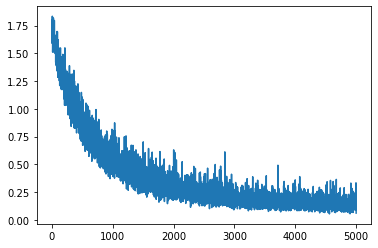

In [18]:
n_iter=5000
model.train_dataset(dataset, show=10, n_epochs=500)
plt.plot(model.cost)

In [14]:
model.forward(X[:,[453]])

array([[0.14516811],
       [0.0563461 ],
       [0.07673214],
       [0.14092746],
       [0.06834345],
       [0.10612618],
       [0.0585567 ],
       [0.10586005],
       [0.08802119],
       [0.15391863]])

In [15]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [16]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

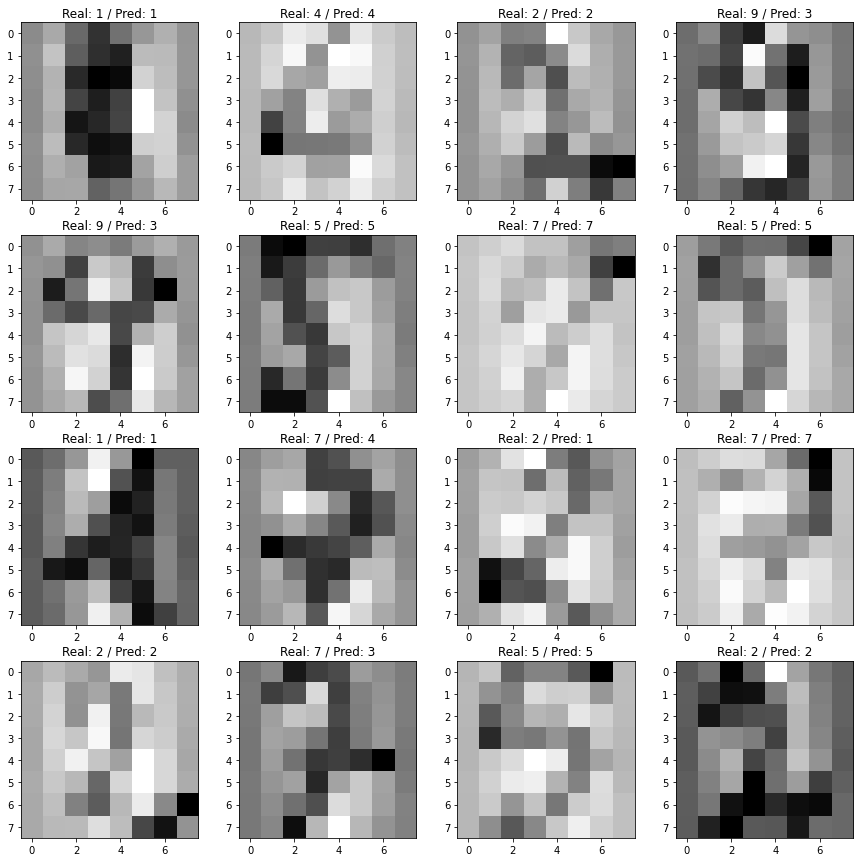

In [17]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')